# Программирование на языках Python и SQL. Контрольная №1 
## Баранов А.В. ПИ19-3 
#### БД Интернет-магазин
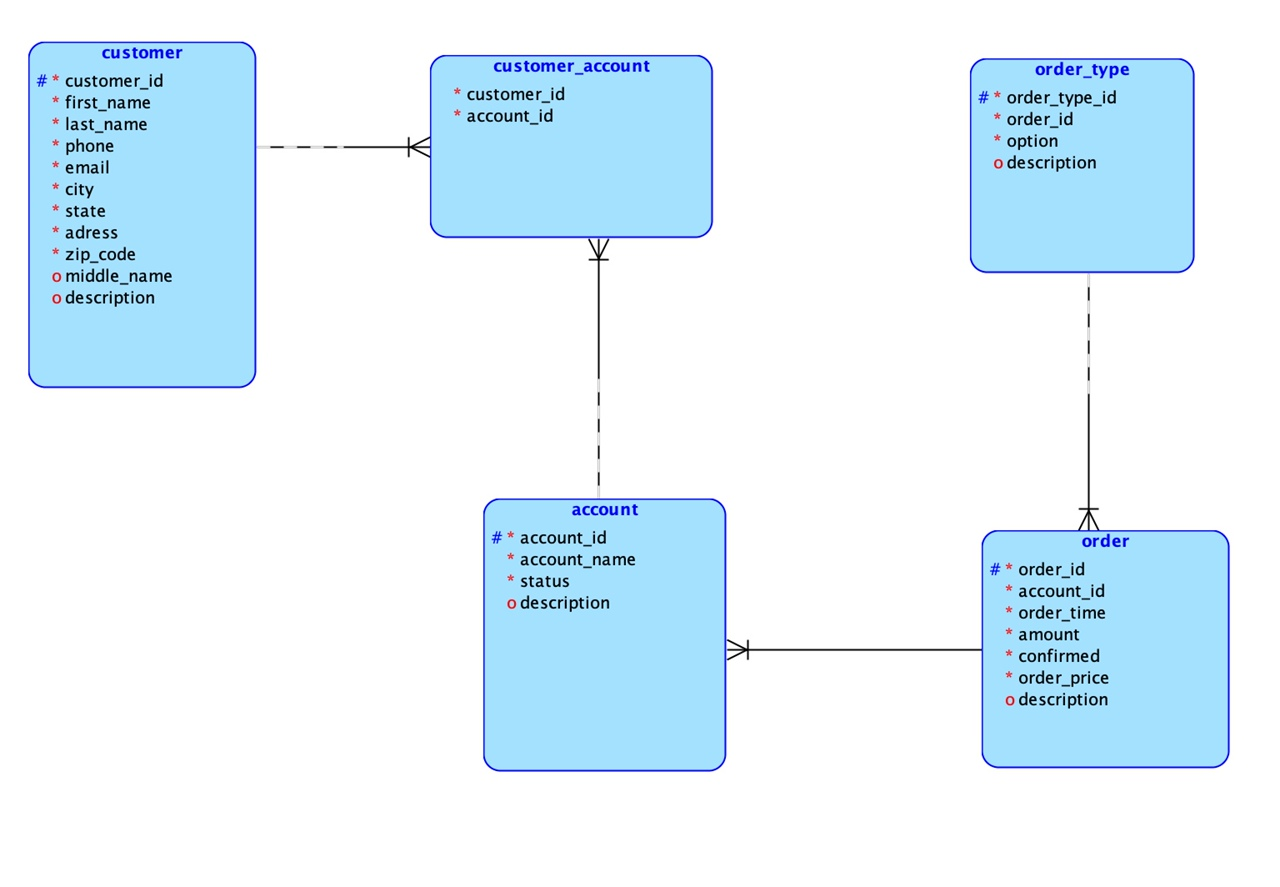

In [8]:
import sqlalchemy
from datetime import datetime
from sqlalchemy import (MetaData, Table, Column, Integer, Numeric, String, DateTime, Boolean, ForeignKey, create_engine, Float)
from sqlalchemy import PrimaryKeyConstraint, UniqueConstraint, CheckConstraint

engine = create_engine("sqlite:///Baranov_Quiz_1.db")
metadata = MetaData()

### Таблица customers
Информация о клиенте
- ИФО
- телефон 
- почта
- город
- государство
- адрес
- почтовый индекс
- описание

In [9]:
customer = Table(
    "customer",
    metadata,
    Column("customer_id", Integer(), primary_key=True),
    Column("first_name", String(255), nullable=False),
    Column("last_name", String(255), nullable=False, index=True),
    Column("middle_name", String(255)),
    Column("phone", String(11), unique=True, nullable=False),
    Column("email", String(255), nullable=False),
    Column("city", String(255), nullable=False),
    Column("state", String(255)),
    Column("adress", String(255), nullable=False),
    Column("zip_code", String(6), nullable=False),
    Column('description', String(255)),
    extend_existing=True,
)

### Таблица account
Информация об аккаунте клиента
- имя аккаунта
- статус
- описание


In [10]:
account = Table(
    "account",
    metadata,
    Column("account_id", Integer(), primary_key=True),
    Column("account_name", String(15), nullable=False, index=True),
    Column("status", String(40), nullable=False),
    Column("description", String(255)),
    extend_existing=True,
)

### Таблица customer_account
Связь М:М таблиц account и customer


In [11]:
customer_account = Table(
    "customer_account",
    metadata,
    Column("customer_id", ForeignKey("customer.customer_id")),
    Column("account_id", ForeignKey("account.account_id")),
    extend_existing=True,
)

### Таблица order
Информация о заказе клиента
- время заказа
- количество
- подтверждение
- цена заказа
- описание


In [12]:
order = Table('order', metadata,
               Column('order_id', Integer(), primary_key=True),
               Column('account_id', ForeignKey('account.account_id'), nullable=False),
               Column('order_time', DateTime(), default=datetime.now),
               Column('amount', Integer(), nullable=False),
               Column('confirmed', Boolean(), default=False),
               Column('order_price', Float(), nullable=False),
               Column('description', String(255)),
               extend_existing=True
            )

### Таблица order_type
Информация о типе заказа клиента
- тип заказа 
- описание

In [13]:
order_type = Table('order_type', metadata,
               Column('order_type_id', Integer(), primary_key=True),
               Column('order_id', ForeignKey('order.order_id'), nullable=False),
               Column('option', String(255), default = 'standart'),
               Column('description', String(255)),
               extend_existing=True
            )

In [14]:
metadata.create_all(engine)